<a href="https://colab.research.google.com/github/catarina1532/catarina1532-fads_ex_09_unsupervised_learning/blob/main/example03-cluster/031-cluster-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GreenDS
# Fundamentals of Data Science
## Example on Unsupervised Machine Learning - Clustering
### Example 03.1

### Introduction

The purpose of this Jupyter Notebook is to demonstrate the process of creating clusters on data for which we do not have a prior classification. We will explore two methods commonly used:
- K-means
- Hierarchical clusterimg

The data to be used is from the Agricultural Census of Portugal, from which data on **level of education**, **labour** data and **production** from 2019 was aggregated in one table, for the level of freguesia.

## 1. Prepare your environment and explore data

Import the necessary modules and the data file.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

Data was extracted from the dms_INE database, using the SQL script stored at the *script* directory of this project. Import data to a Pandas Dataframe:

In [ ]:
# read data
census_df = pd.read_csv("/data_agric_census_freg.csv")
census_df.shape

(3068, 16)

We can see that the file contains 3068 rows and 16 columns. Let us see the structure of the Pandas dataframe:

In [ ]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   freguesia      3068 non-null   object 
 1   municipality   3068 non-null   object 
 2   NUTS2          3068 non-null   object 
 3   e_none         3068 non-null   int64  
 4   e_basic        3068 non-null   int64  
 5   e_secondary    3068 non-null   int64  
 6   e_superior     3068 non-null   int64  
 7   l_family       3068 non-null   int64  
 8   l_holder       3068 non-null   int64  
 9   l_spouse       3068 non-null   int64  
 10  l_other_fam    3068 non-null   int64  
 11  l_regular      3068 non-null   int64  
 12  l_non_regular  3068 non-null   int64  
 13  l_non_hired    3068 non-null   int64  
 14  value_eur      3068 non-null   int64  
 15  area_ha        3068 non-null   float64
dtypes: float64(1), int64(12), object(3)
memory usage: 383.6+ KB


We can also see a preview of the table:

In [ ]:
census_df.head()

,freguesia,municipality,NUTS2,e_none,e_basic,e_secondary,e_superior,l_family,l_holder,l_spouse,l_other_fam,l_regular,l_non_regular,l_non_hired,value_eur,area_ha
0,Aboim das Choças,Arcos de Valdevez,Norte,15,61,11,7,34,15,13,6,1,0,0,101072,1921.9
1,Aguiã,Arcos de Valdevez,Norte,24,68,5,2,70,38,27,5,0,2,0,156561,1642.8
2,Ázere,Arcos de Valdevez,Norte,3,48,12,5,18,11,5,2,0,1,0,140132,2428.6
3,Cabana Maior,Arcos de Valdevez,Norte,24,34,5,0,25,15,9,1,0,0,0,189450,152.7
4,Cabreiro,Arcos de Valdevez,Norte,66,107,23,8,114,71,32,11,6,3,0,612235,221.4


The table contains 16 columns. The first three are the freguesia (the operational unit of the table), its municipality and the NUTS 2 level. The following columns correspond to education (e prefix), labour (l prefix) and the final two to the production value, in euros, and production area, in hectars.

We can start exploring data by checking the histograms.

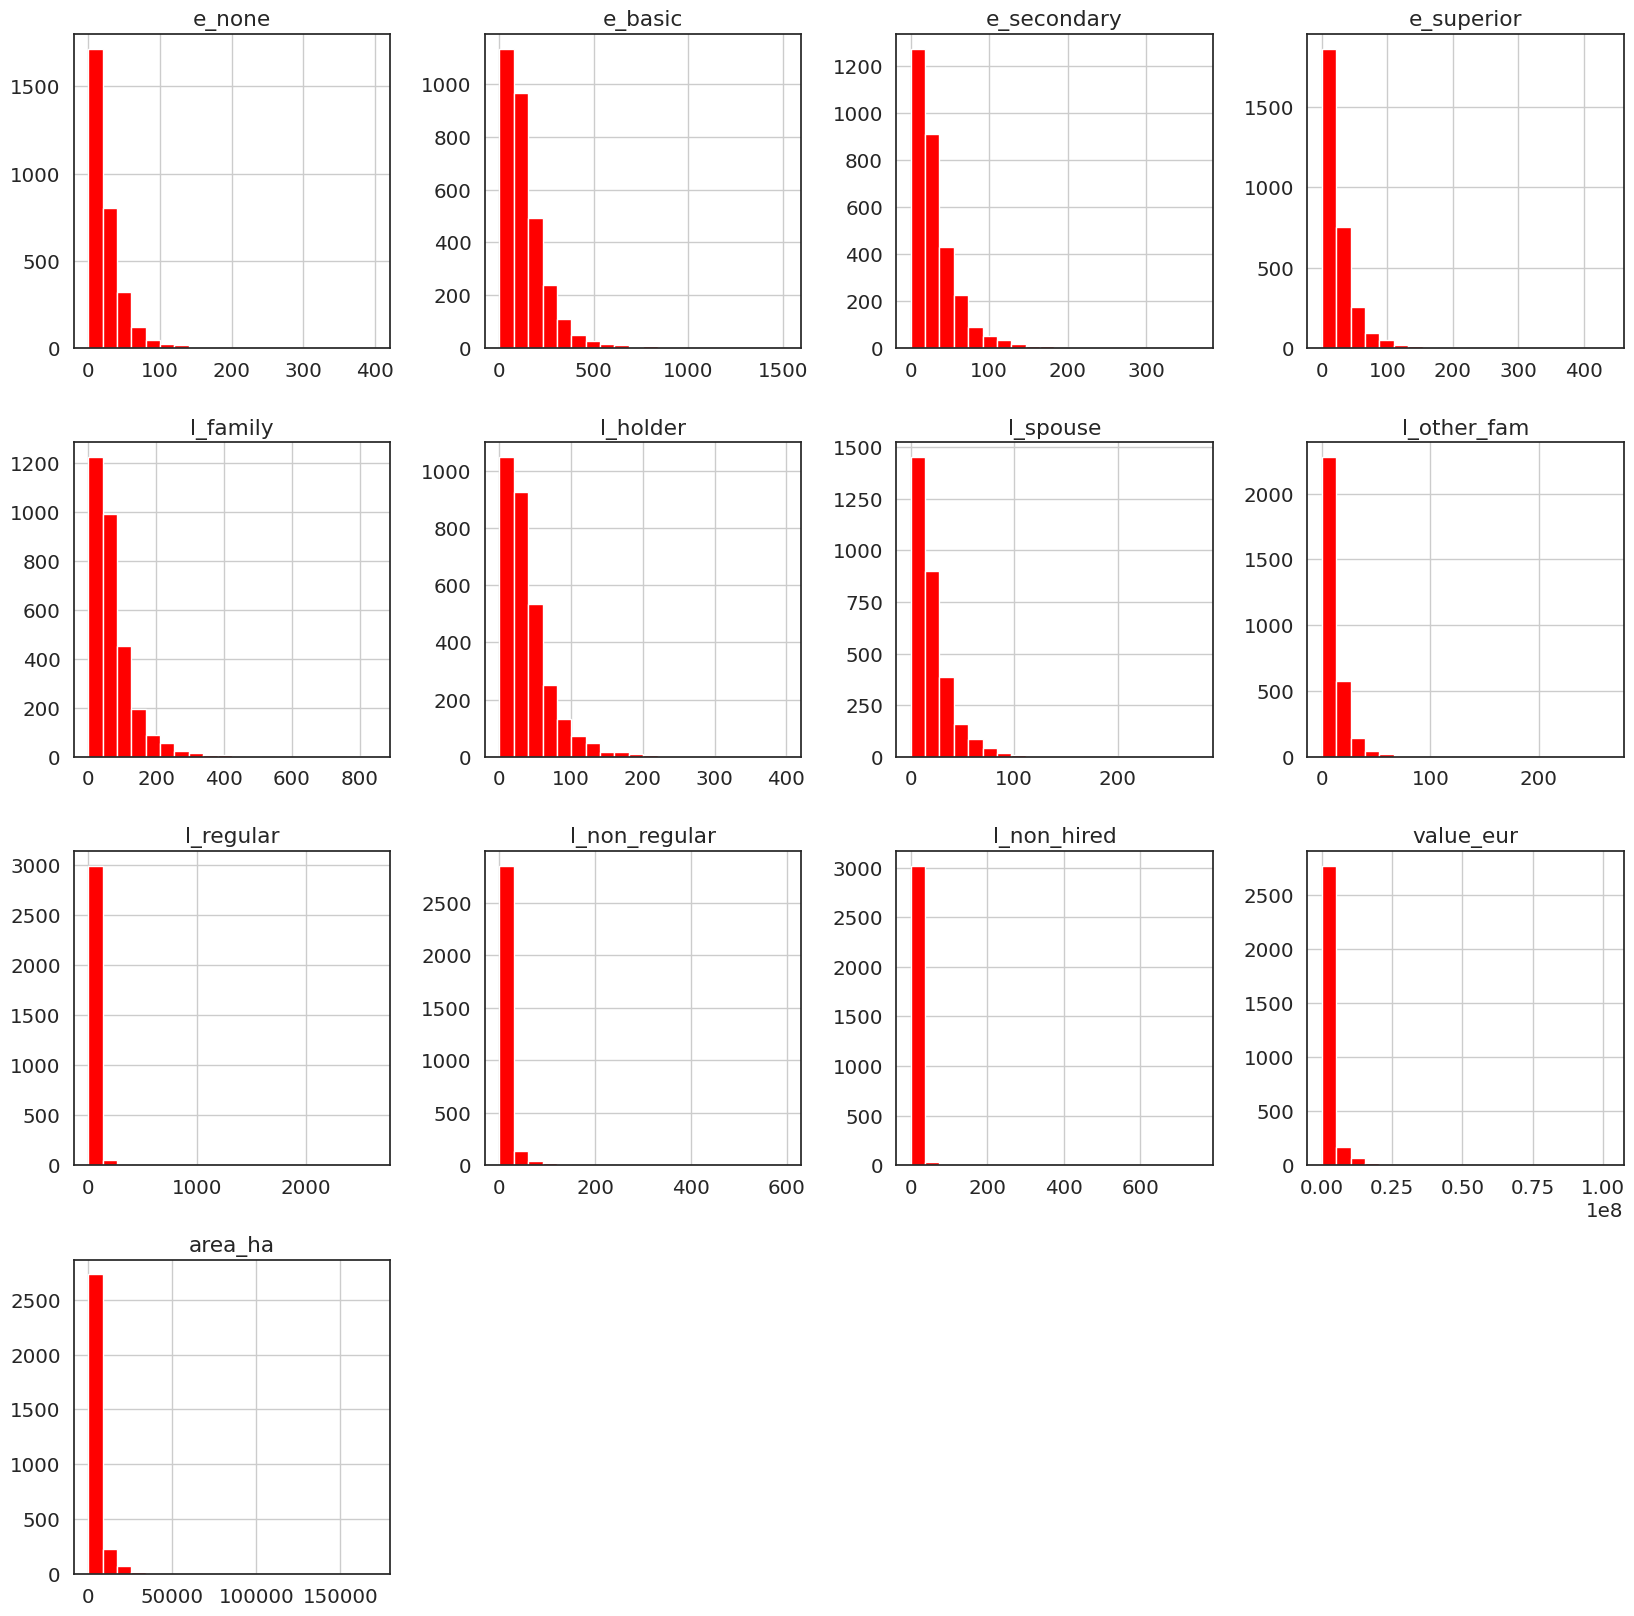

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=census_df.hist(bins=20,color='red' )

We can observe that most of them are skewed, indicating a uneven distribution. This might have implications in the efficiency of the use of lienar methods to analyse data. Let's create another visualization, creating a scatterplot matrix between all variables. It is suggested that you analyse the output image in detail.

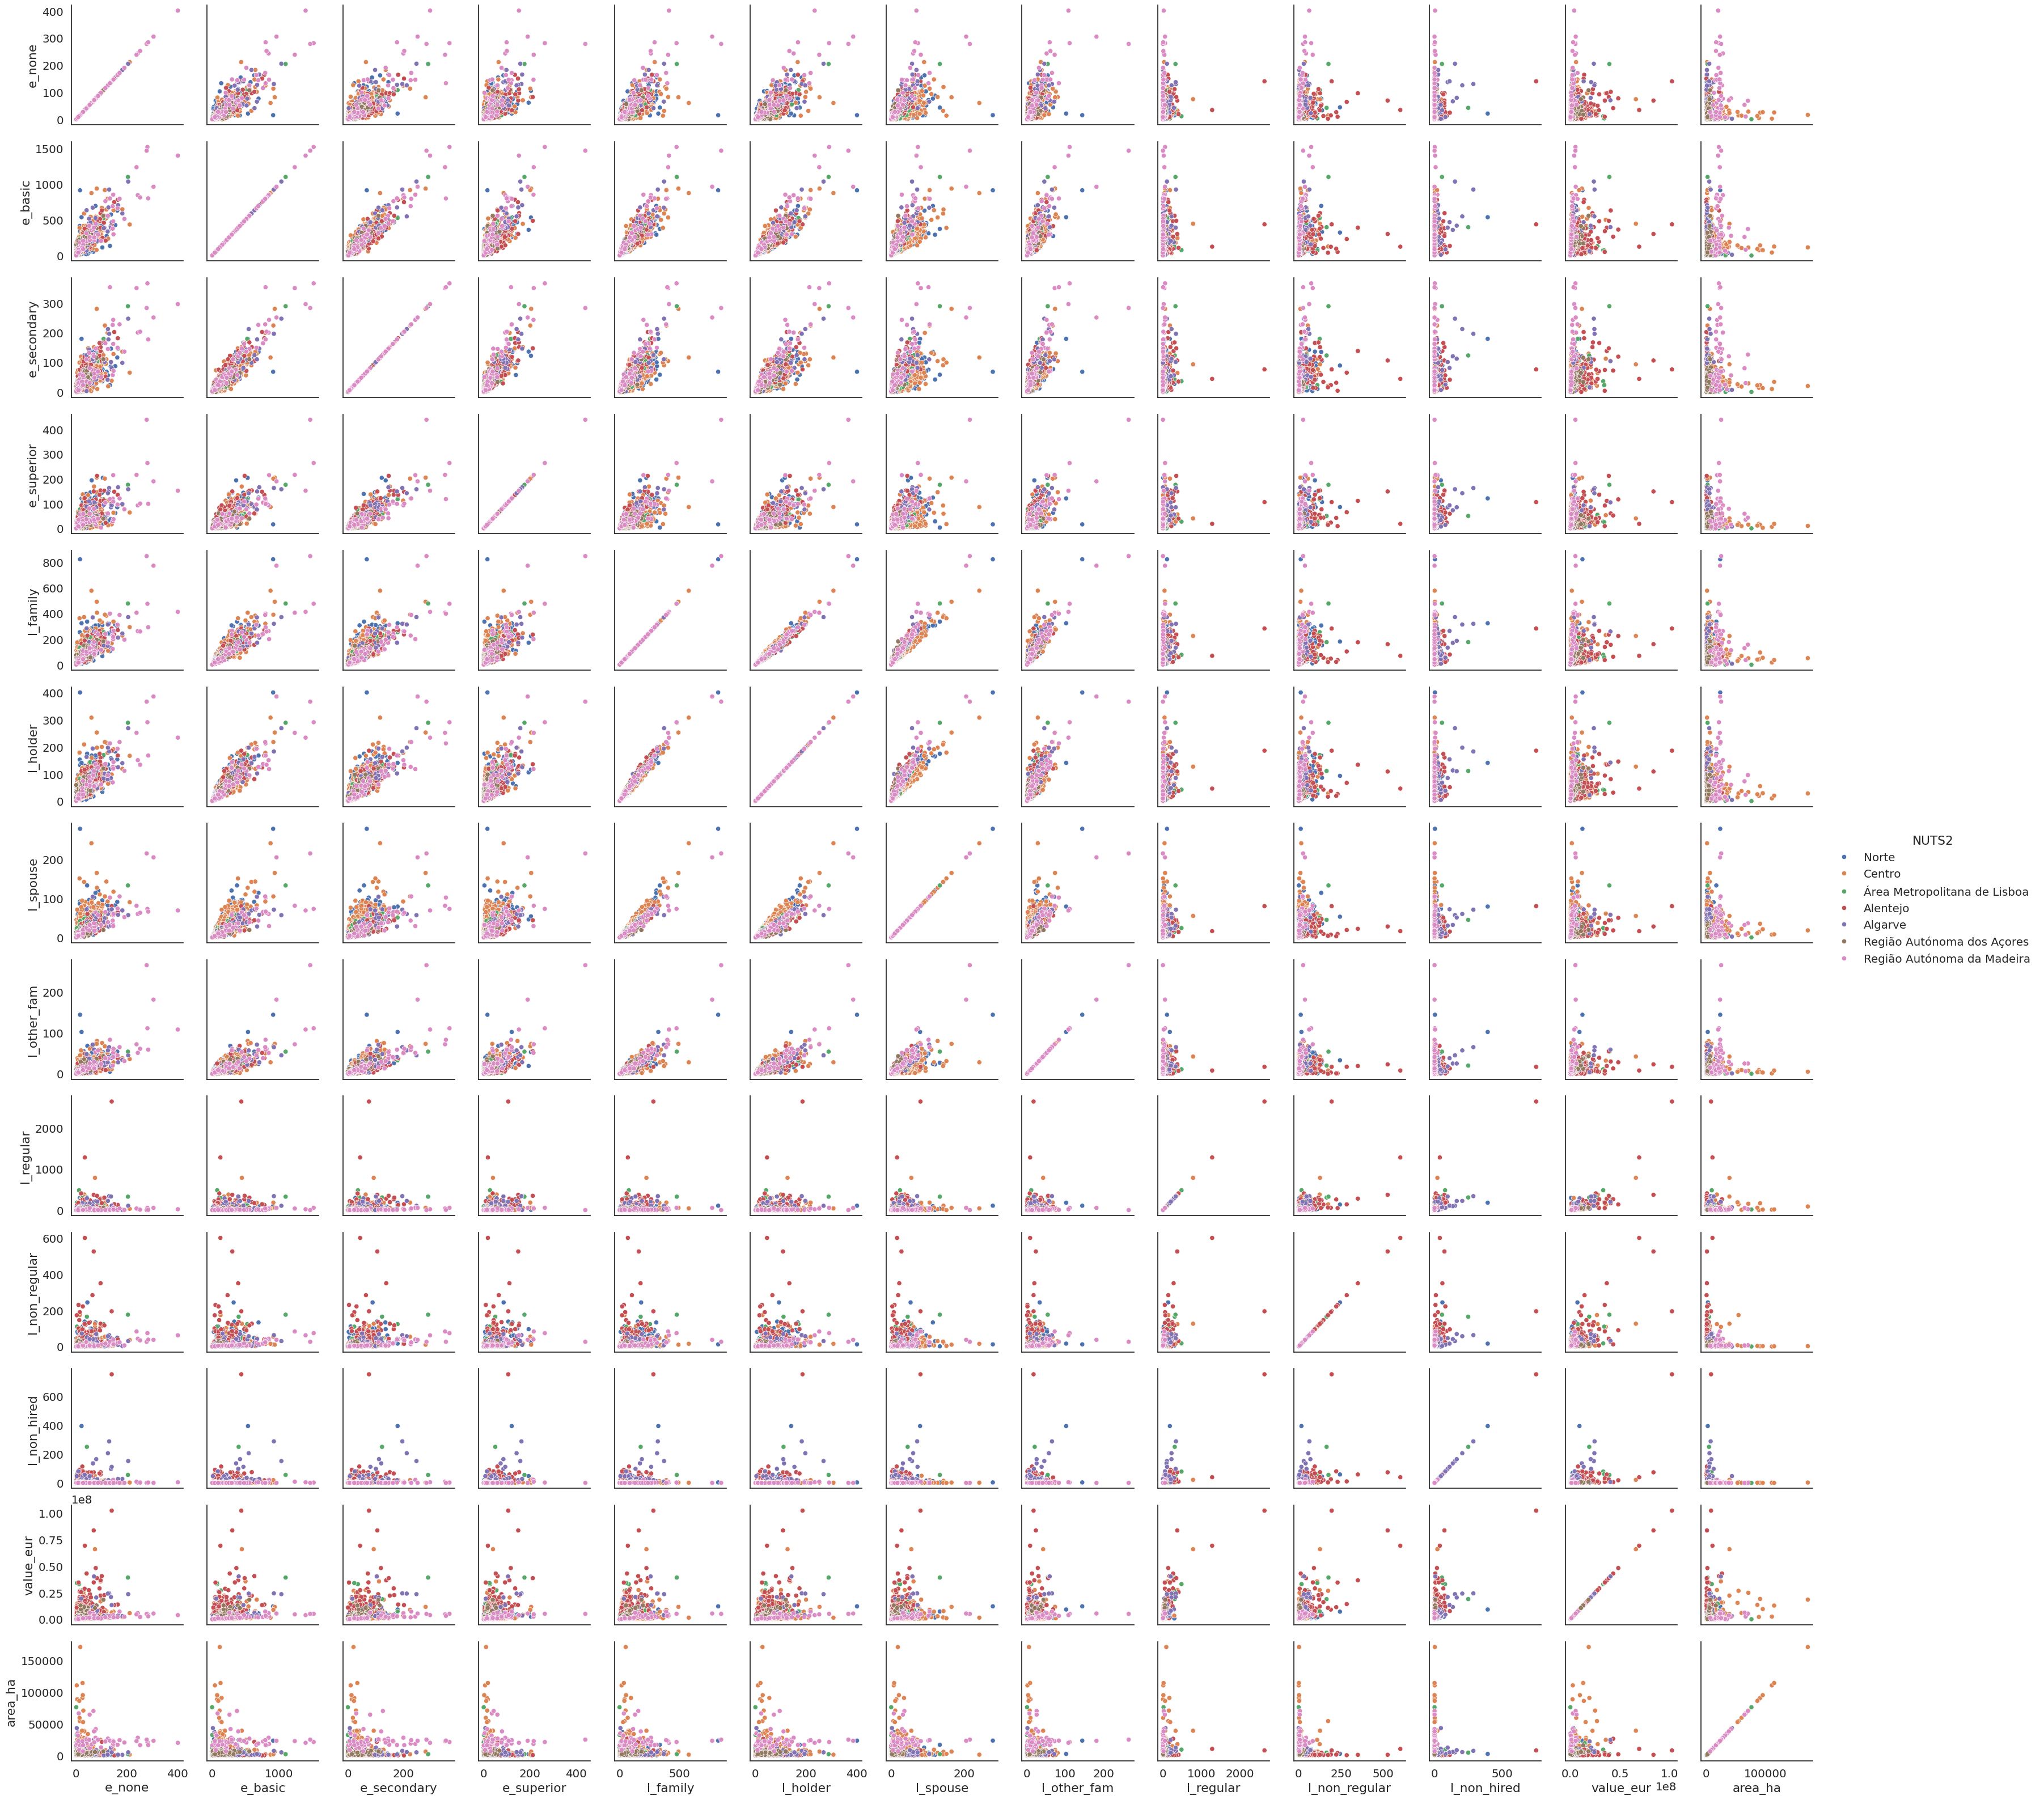

In [ ]:
g = sns.PairGrid(census_df, hue="NUTS2")
g.map(sns.scatterplot)
g.add_legend()

The detailed analysis reveals that there seems to be a group of samples of different behaviour than the others. These are the samples from Madeira and Azores. Since these regions are insular, and in the context of agriculture are naturally particular and different to the practices of Portugal Mainland, it might be a good idea to remove the rows from these two regions from the analysis. Therefore, we filtered only the rows for the NUTS 2 of Portugal Mainland.

In [ ]:
values = ['Norte','Centro','Área Metropolitana de Lisboa', 'Alentejo', 'Algarve']
df1 = census_df.loc[census_df['NUTS2'].isin(values)].copy()

Let us preview the current format of the dataframe.

In [ ]:
df1.head()

,freguesia,municipality,NUTS2,e_none,e_basic,e_secondary,e_superior,l_family,l_holder,l_spouse,l_other_fam,l_regular,l_non_regular,l_non_hired,value_eur,area_ha
0,Aboim das Choças,Arcos de Valdevez,Norte,15,61,11,7,34,15,13,6,1,0,0,101072,1921.9
1,Aguiã,Arcos de Valdevez,Norte,24,68,5,2,70,38,27,5,0,2,0,156561,1642.8
2,Ázere,Arcos de Valdevez,Norte,3,48,12,5,18,11,5,2,0,1,0,140132,2428.6
3,Cabana Maior,Arcos de Valdevez,Norte,24,34,5,0,25,15,9,1,0,0,0,189450,152.7
4,Cabreiro,Arcos de Valdevez,Norte,66,107,23,8,114,71,32,11,6,3,0,612235,221.4


And we can make a scatter plot to compare two variables, in this case the production value and production area.

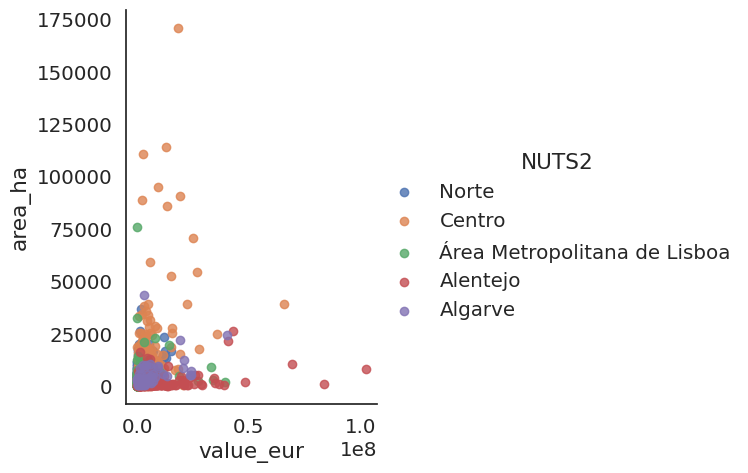

In [ ]:
sns.lmplot( x="value_eur", y="area_ha", data=df1, fit_reg=False, hue='NUTS2', legend=True)

In the next cell, create biplots between the production value and other variables of education and labour factors.

In [ ]:
# put your code here

In order to continue with the analysis, we will remove the columns that are non-numeric (identified as *object* in the dataframe structure above)

In [ ]:
df1.drop(['municipality', 'freguesia', 'NUTS2'], axis = 1, inplace = True)

In [ ]:
df1.head()

,e_none,e_basic,e_secondary,e_superior,l_family,l_holder,l_spouse,l_other_fam,l_regular,l_non_regular,l_non_hired,value_eur,area_ha
0,15,61,11,7,34,15,13,6,1,0,0,101072,1921.9
1,24,68,5,2,70,38,27,5,0,2,0,156561,1642.8
2,3,48,12,5,18,11,5,2,0,1,0,140132,2428.6
3,24,34,5,0,25,15,9,1,0,0,0,189450,152.7
4,66,107,23,8,114,71,32,11,6,3,0,612235,221.4


We can also prepare a summary table for the dataframe, with descriptive statistics:

In [ ]:
df1.describe(include='all')

,e_none,e_basic,e_secondary,e_superior,l_family,l_holder,l_spouse,l_other_fam,l_regular,l_non_regular,l_non_hired,value_eur,area_ha
count,2858.000000,2858.000000,2858.000000,2858.000000,2858.000000,2858.000000,2858.000000,2858.000000,2858.000000,2858.000000,2858.000000,2.858000e+03,2858.000000
mean,24.181246,131.563331,29.861092,24.155353,68.982855,38.526242,20.178446,10.386984,20.017145,10.136459,3.486704,2.178883e+06,3961.614836
std,23.915059,115.296087,28.110898,25.185215,60.683535,33.733408,19.496991,10.401193,68.855675,25.875951,20.248958,5.092582e+06,7374.743620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.103000e+03,0.000000
25%,8.000000,54.000000,11.000000,8.000000,28.000000,16.000000,7.000000,4.000000,1.000000,1.000000,0.000000,3.399678e+05,1012.775000
50%,18.000000,101.500000,22.000000,17.000000,54.000000,30.000000,15.000000,7.000000,5.000000,3.000000,0.000000,7.599300e+05,2198.950000
75%,32.000000,178.000000,39.000000,32.000000,90.000000,51.000000,27.000000,14.000000,17.000000,9.000000,1.000000,1.851618e+06,4332.025000
max,211.000000,1102.000000,289.000000,212.000000,822.000000,401.000000,278.000000,144.000000,2646.000000,601.000000,751.000000,1.023541e+08,171049.600000


Boxplots are very usefull to analyse the presence of outliers. The next code generates a boxplot for each variable:

/tmp/ipython-input-1226904876.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df1['e_none'], palette='Spectral').set_title("education none")
/tmp/ipython-input-1226904876.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], data=df1['e_basic'], palette='Spectral').set_title("education basic")
/tmp/ipython-input-1226904876.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 2], data=df1['e_secondary'], palette='Spectral').set_title("education secondary")
/tmp/ipython-input-1226904876.py:7: Futu

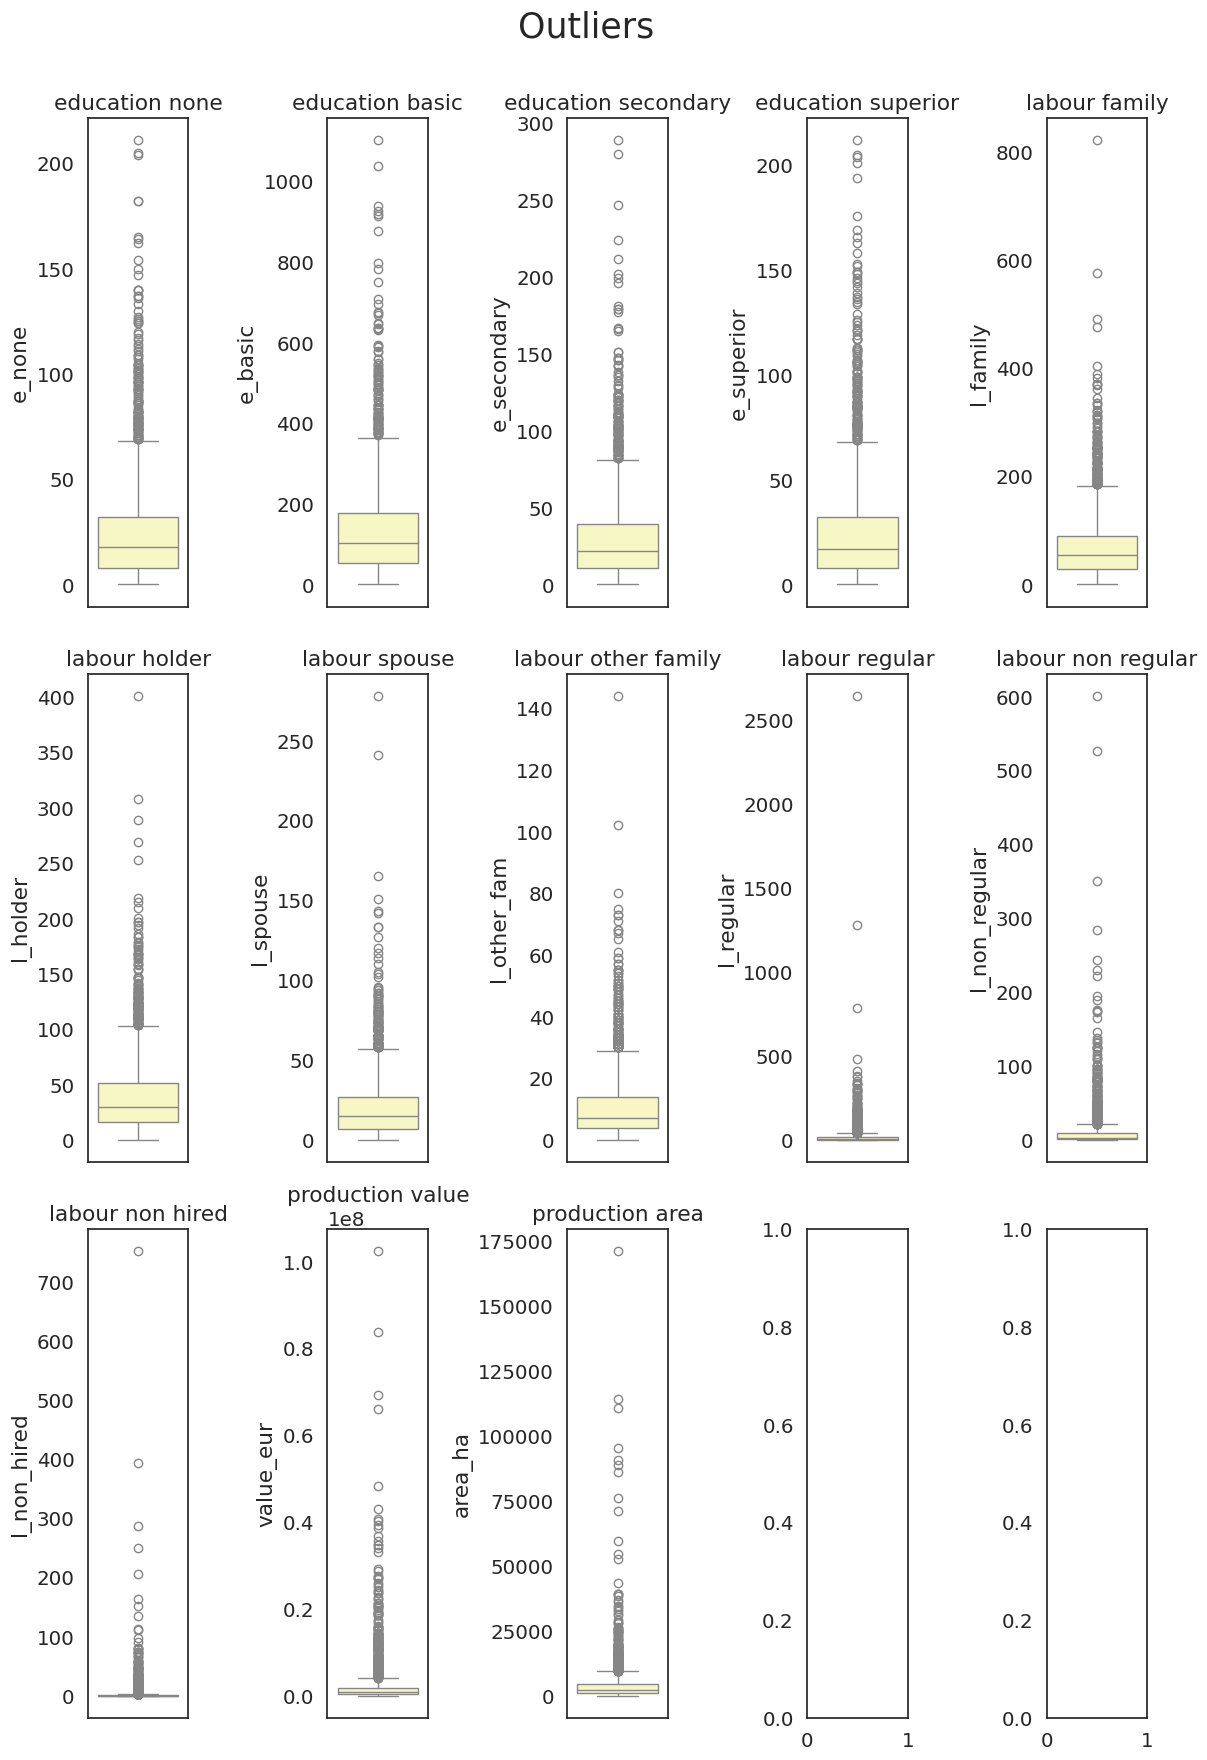

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5,figsize=(12,18))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0, 0], data=df1['e_none'], palette='Spectral').set_title("education none")
sns.boxplot(ax=axes[0, 1], data=df1['e_basic'], palette='Spectral').set_title("education basic")
sns.boxplot(ax=axes[0, 2], data=df1['e_secondary'], palette='Spectral').set_title("education secondary")
sns.boxplot(ax=axes[0, 3], data=df1['e_superior'], palette='Spectral').set_title("education superior")
sns.boxplot(ax=axes[0, 4], data=df1['l_family'], palette='Spectral').set_title("labour family")
sns.boxplot(ax=axes[1, 0], data=df1['l_holder'], palette='Spectral').set_title("labour holder")
sns.boxplot(ax=axes[1, 1], data=df1['l_spouse'], palette='Spectral').set_title("labour spouse")
sns.boxplot(ax=axes[1, 2], data=df1['l_other_fam'], palette='Spectral').set_title("labour other family")
sns.boxplot(ax=axes[1, 3], data=df1['l_regular'], palette='Spectral').set_title("labour regular")
sns.boxplot(ax=axes[1, 4], data=df1['l_non_regular'], palette='Spectral').set_title("labour non regular")
sns.boxplot(ax=axes[2, 0], data=df1['l_non_hired'], palette='Spectral').set_title("labour non hired")
sns.boxplot(ax=axes[2, 1], data=df1['value_eur'], palette='Spectral').set_title("production value")
sns.boxplot(ax=axes[2, 2], data=df1['area_ha'], palette='Spectral').set_title("production area")

plt.tight_layout()


As we suspected from the analysis of the histograms above, there are many outliers.

## Scaling data

Now, we will make a copy of the dataframe. The new dataframe will be scaled, which means reduce all variables to the same range of variation. This is important so that a variable does not have a higher weight in the cluster analysis only because its absolute values are higher.

In [ ]:
df2 = df1.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3=scaler.fit_transform(df2)

In [ ]:
# Check the scaled values
df3

array([[-0.38397783, -0.61212554, -0.67107044, ..., -0.17222191,
        -0.40807876, -0.27662952],
       [-0.00758005, -0.55140166, -0.88454814, ..., -0.17222191,
        -0.39718081, -0.31448152],
       [-0.88584153, -0.72489845, -0.63549082, ..., -0.17222191,
        -0.40040744, -0.20791002],
       ...,
       [-0.96948548, -1.1152662 , -1.06244623, ..., -0.17222191,
        -0.42605354, -0.21104288],
       [ 2.45991648,  0.64572612,  0.82327352, ...,  1.06262558,
         1.14214756,  0.06873105],
       [-0.96948548, -0.97646878, -0.95570738, ..., -0.17222191,
        -0.38717863, -0.12767625]])

## 2. Determine k

First, we need to determine the number of clusters, k. We can use the Elbow method as a guide.

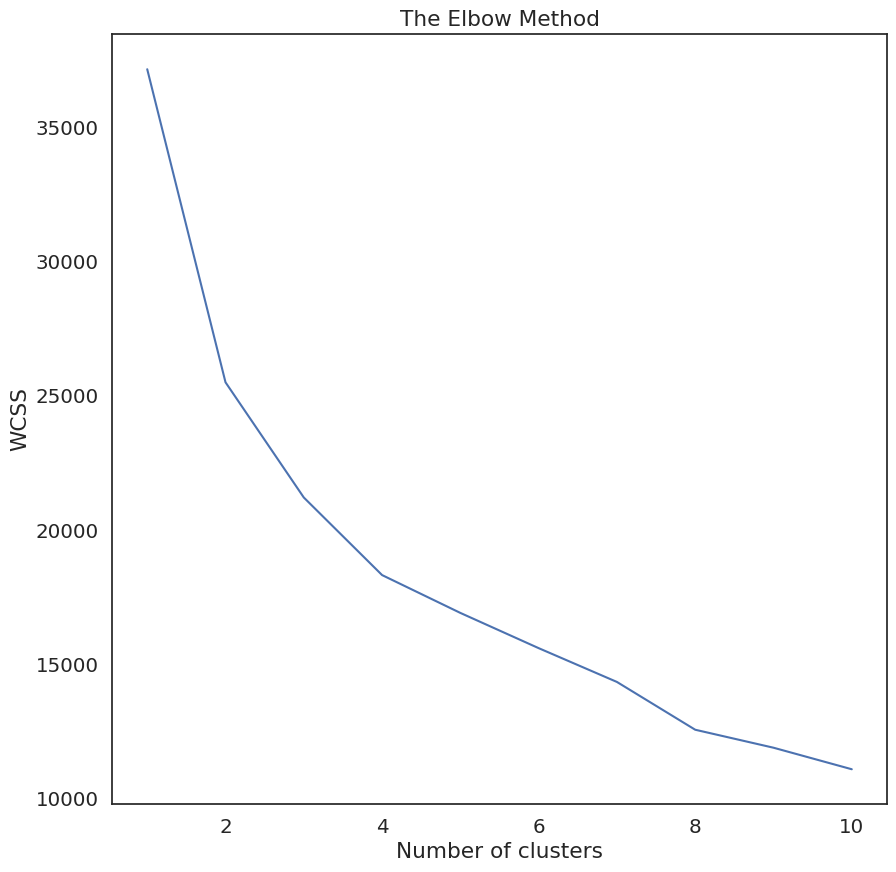

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)

plt.subplots(nrows=1, ncols=1,figsize=(10,10))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

To determine the number of clusters, we can try to identify in which step the change of the slope in the curve is more pronounced.

Another help can be from a dendogram. This is a representation of an agglomerative clustering, also an unsupervised method.

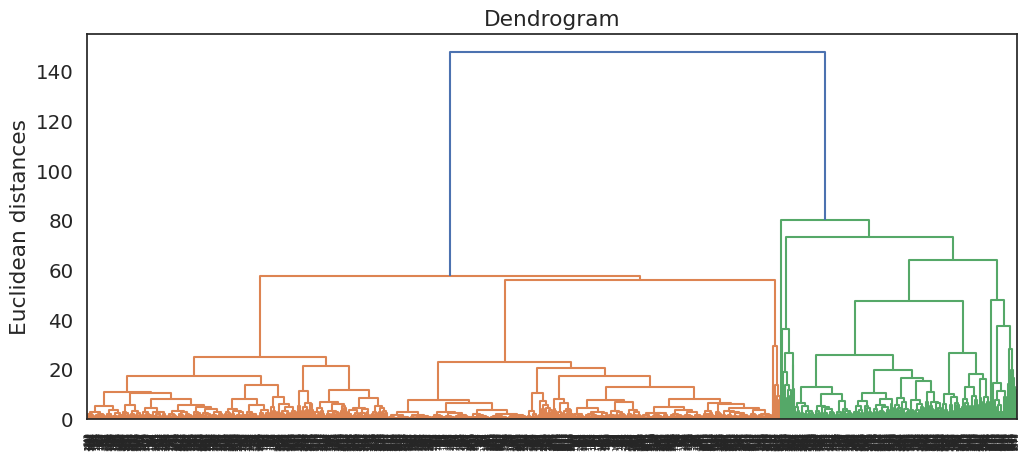

In [ ]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(df3, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

From the Elbow method and the dendogram, it seams that there are 4 clusters, with one very small. Let's use that number.

## 3. Start K-means calculation

In [ ]:
df_kmeans = df2.copy()

In [ ]:
# Training model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_kmeans)

In [ ]:
df_kmeans

,e_none,e_basic,e_secondary,e_superior,l_family,l_holder,l_spouse,l_other_fam,l_regular,l_non_regular,l_non_hired,value_eur,area_ha
0,15,61,11,7,34,15,13,6,1,0,0,101072,1921.9
1,24,68,5,2,70,38,27,5,0,2,0,156561,1642.8
2,3,48,12,5,18,11,5,2,0,1,0,140132,2428.6
3,24,34,5,0,25,15,9,1,0,0,0,189450,152.7
4,66,107,23,8,114,71,32,11,6,3,0,612235,221.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,7,20,9,1,10,6,1,2,1,0,0,477153,565.2
2854,34,108,36,22,55,38,9,8,9,1,2,2025760,525.2
2855,1,3,0,2,3,1,2,0,0,0,0,9550,2405.5
2856,83,206,53,52,90,48,22,20,208,23,25,7994345,4468.4


In [ ]:
df_kmeans = df1.copy()
# Checking number of items in clusters and creating 'Cluster' column
df_kmeans['Cluster'] = y_kmeans
df_kmeans['Cluster'].value_counts()

,count
Cluster,
0,2431
2,303
4,95
1,25
3,4


The number of elements of each cluster if very different. There are only four samples that belong to cluster 3. This requires the detailed identification of that samples, in order to understand why they separate from other samples. We can make a plot to check the clusters in relation to two variables selected.

<Axes: xlabel='e_secondary', ylabel='value_eur'>

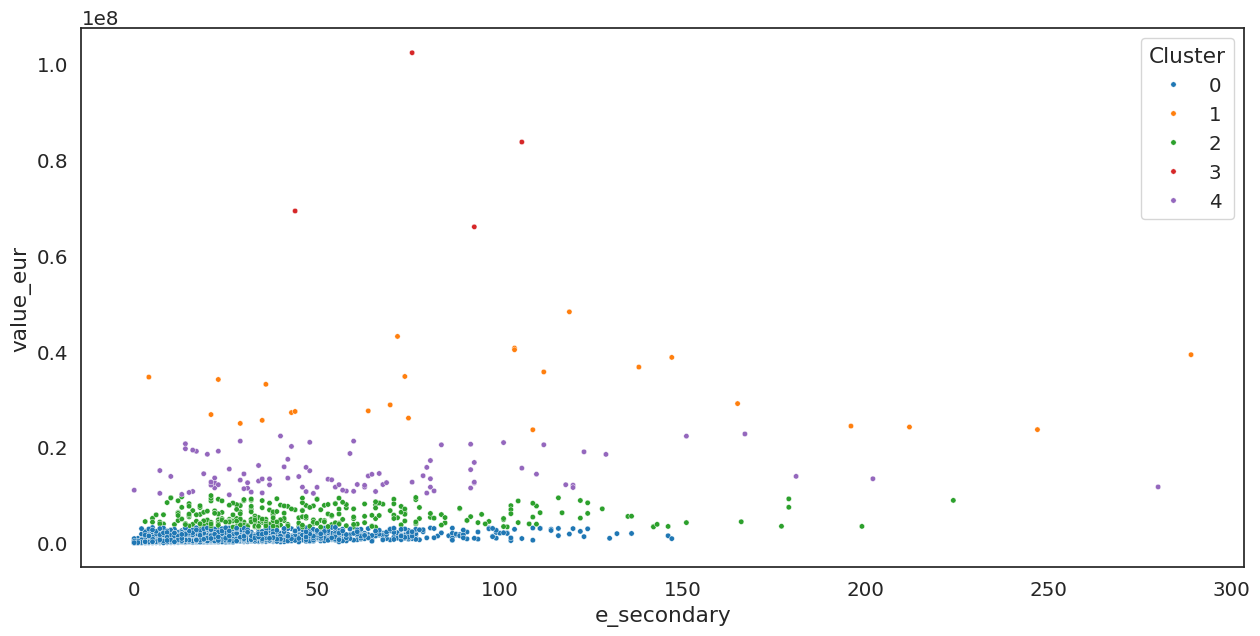

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_kmeans, x='e_secondary', y='value_eur', hue = 'Cluster', s=15, palette="tab10")

The production value seems to be a major factor for the creation of clusters. The samples of cluster 3 are the ones with higher value. We could pursue this indication to identify which freguesias are these, and try to understand its behaviour.

Try to plot the production value againts other variables, to see how the clusters appear.

In [ ]:
# add your code here to create plots...

# 4. Hierarchical clustering
## Agglomerative clustering

Another unsupervised ML clustering method is Agglomerative clustering. The approach is different. First, a distance metrics is determined for all samples, and after that, a cluster method is applied to aggregate samples based on the distance. In this case, we will use the Euclidean distance and the Ward cluster method.

In [ ]:
# Copying data sets
df_AgglomerativeC = df3.copy()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Training model
AgglomerativeC = AgglomerativeClustering(n_clusters=4, metric = 'euclidean', linkage = 'ward')
y_AgglomerativeC = AgglomerativeC.fit_predict(df_AgglomerativeC)

In [ ]:
df_AgglomerativeC = df2.copy()
# Checking number of items in clusters and creating 'Cluster' column
df_AgglomerativeC['Cluster'] = y_AgglomerativeC
df_AgglomerativeC['Cluster'].value_counts()

,count
Cluster,
1,2134
0,685
3,38
2,1


Four clusters were created. Again, one of the clusters only has one value. Let's create a plot.

<Axes: xlabel='e_secondary', ylabel='value_eur'>

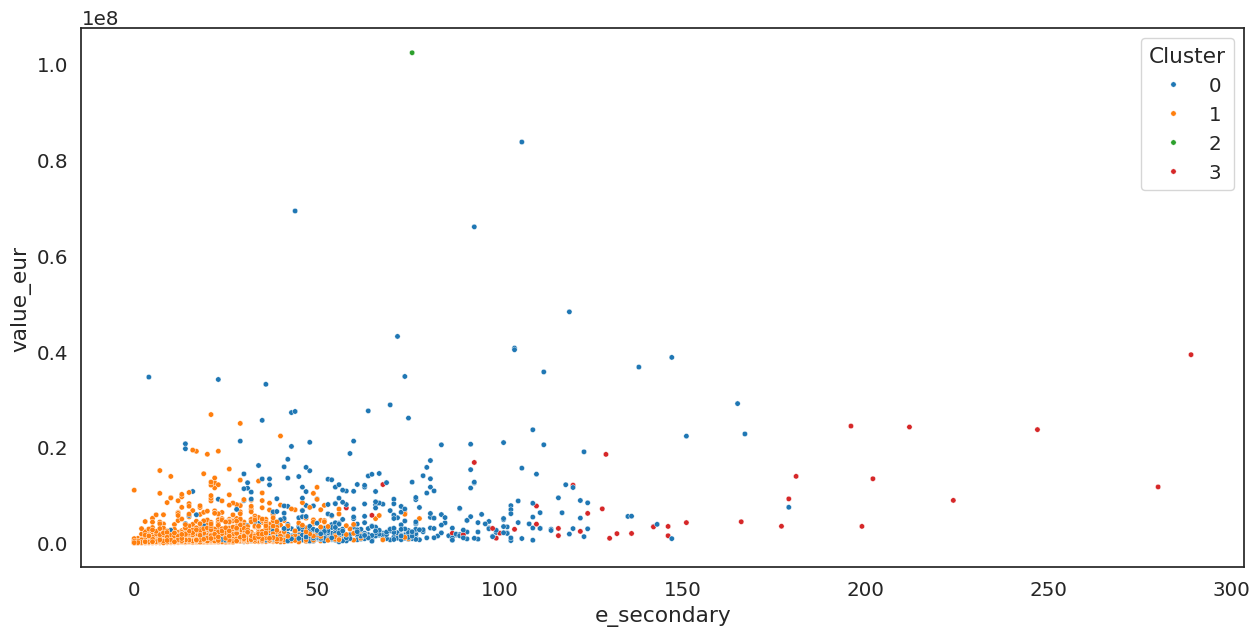

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_AgglomerativeC, x='e_secondary', y='value_eur', hue = 'Cluster', s=15, palette="tab10")

The segregation is not as clear as in the result of the k-means. The work on this dataset still needs mode exploration. Continue to the other notebook of this example.